In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
os.getcwd()


'/workspace/gfm-gap-filling-baseline/gap-filling-baseline'

In [90]:
job_id = "subset_400"

In [91]:
# set up directory paths
root_dir = "/workspace/gfm-gap-filling-baseline/data/results"
job_ids = [d for d in os.listdir() if os.path.isdir(d) and d.startswith(job_id)]

checkpoint_dir = pathlib.Path(job_id)
os.makedirs(pathlib.Path(root_dir) / "all_results" / checkpoint_dir, exist_ok=True)

checkpoint_dirs = [pathlib.Path(d) for d in os.listdir(root_dir) if d.startswith(job_id)]

print(checkpoint_dirs)

[PosixPath('subset_400_2024-01-25-18:50:43'), PosixPath('subset_400_2024-01-25-18:50:17'), PosixPath('subset_400_2024-01-25-18:50:37'), PosixPath('subset_400_2024-01-25-18:50:33'), PosixPath('subset_400_2024-01-25-18:50:29')]


In [92]:
os.makedirs(pathlib.Path(root_dir) / "all_results", exist_ok=True)

In [93]:
for n, checkpoint_dir in enumerate(checkpoint_dirs):
    file_path = root_dir / checkpoint_dir / "log_training.txt"
    
    # extract training length from job id
    training_length = job_id[7:11]
    
    with open(file_path, "r") as file:
        lines = file.readlines()
    
    # join lines 14 onwards into a single string
    start_line = 14
    log_string = "".join(lines[start_line - 1 :])

    # split the log into individual lines
    log_lines = log_string.strip().split('\n')
    for line in log_lines[:3]:
        parts = line.split(',')

    lines = log_string.strip().split('\n')

    # create lists to store statistics for each epoch
    timestamps = []
    epochs = []
    train_g_losses = []
    train_d_losses = []
    train_mses = []
    train_maes = []
    train_ssims = []
    valid_g_losses = []
    valid_d_losses = []
    valid_mses = []
    valid_maes = []
    valid_ssims = []
    
    # process each line to extract statistics for each epoch
    for line in lines:
        # split the line by commas
        parts = line.split(',')
        
        # extract epoch number from the 'epoch' part
        epoch = int(parts[1][-4:].strip())
        
        # extract metrics for the epoch
        metrics = {}
        for part in parts[2:]:
            key, value = part.strip().split(':')
            metrics[key.strip()] = float(value.strip())
        
        # append statistics to the respective lists
        epochs.append(epoch)
        train_g_losses.append(metrics['train_g_loss'])
        train_d_losses.append(metrics['train_d_loss'])
        train_mses.append(metrics['train_mse'])
        train_maes.append(metrics['train_mae'])
        train_ssims.append(metrics['train_ssim'])
        valid_g_losses.append(metrics['valid_g_loss'])
        valid_d_losses.append(metrics['valid_d_loss'])
        valid_mses.append(metrics['valid_mse'])
        valid_maes.append(metrics['valid_mae'])
        valid_ssims.append(metrics['valid_ssim'])
    
    # create a dictionary with the extracted statistics
    data = {
        "Epoch": epochs,
        f"Training Generator Loss {n}": train_g_losses,
        f"Training Discriminator Loss {n}": train_d_losses,
        f"Training MSE {n}": train_mses,
        f"Training MAE {n}": train_maes,
        f"Training SSIM {n}": train_ssims,
        f"Validation Generator Loss {n}": valid_g_losses,
        f"Validation Discriminator Loss {n}": valid_d_losses,
        f"Validation MSE {n}": valid_mses,
        f"Validation MAE {n}": valid_maes,
        f"Validation SSIM {n}": valid_ssims,
    }

    if n == 0:
        df = pd.DataFrame(data).head(200)
    
    if n > 0:
        new_df = pd.DataFrame(data).head(200)
        df = df.join(new_df.set_index('Epoch'), on="Epoch", how="left")
        

In [94]:
df.columns

Index(['Epoch', 'Training Generator Loss 0', 'Training Discriminator Loss 0',
       'Training MSE 0', 'Training MAE 0', 'Training SSIM 0',
       'Validation Generator Loss 0', 'Validation Discriminator Loss 0',
       'Validation MSE 0', 'Validation MAE 0', 'Validation SSIM 0',
       'Training Generator Loss 1', 'Training Discriminator Loss 1',
       'Training MSE 1', 'Training MAE 1', 'Training SSIM 1',
       'Validation Generator Loss 1', 'Validation Discriminator Loss 1',
       'Validation MSE 1', 'Validation MAE 1', 'Validation SSIM 1',
       'Training Generator Loss 2', 'Training Discriminator Loss 2',
       'Training MSE 2', 'Training MAE 2', 'Training SSIM 2',
       'Validation Generator Loss 2', 'Validation Discriminator Loss 2',
       'Validation MSE 2', 'Validation MAE 2', 'Validation SSIM 2',
       'Training Generator Loss 3', 'Training Discriminator Loss 3',
       'Training MSE 3', 'Training MAE 3', 'Training SSIM 3',
       'Validation Generator Loss 3', 'Valid

In [95]:
df.head

<bound method NDFrame.head of      Epoch  Training Generator Loss 0  Training Discriminator Loss 0  \
0        1                     28.348                          1.235   
1        2                      3.205                          0.617   
2        3                      1.386                          0.745   
3        4                      4.119                          0.400   
4        5                      1.451                          0.508   
..     ...                        ...                            ...   
195    196                      1.007                          0.985   
196    197                      1.079                          1.005   
197    198                      0.915                          0.944   
198    199                      0.987                          0.999   
199    200                      1.066                          1.023   

     Training MSE 0  Training MAE 0  Training SSIM 0  \
0          5.601863          0.7026         0.697

In [96]:
train_gen_loss = [f'Training Generator Loss {n}' for n in range(5)]
train_disc_loss = [f'Training Discriminator Loss {n}' for n in range(5)]
train_mse = [f'Training MSE {n}' for n in range(5)]
train_mae = [f'Training MAE {n}' for n in range(5)]
train_ssim = [f'Training SSIM {n}' for n in range(5)]
val_gen_loss = [f'Validation Generator Loss {n}' for n in range(5)]
val_disc_loss = [f'Validation Discriminator Loss {n}' for n in range(5)]
val_mse = [f'Validation MSE {n}' for n in range(5)]
val_mae = [f'Validation MAE {n}' for n in range(5)]
val_ssim = [f'Validation SSIM {n}' for n in range(5)]

df['Training Generator Loss Mean'] = df[train_gen_loss].mean(axis=1)
df['Training Discriminator Loss Mean'] = df[train_disc_loss].mean(axis=1)
df['Training MSE Mean'] = df[train_mse].mean(axis=1)
df['Training MAE Mean'] = df[train_mae].mean(axis=1)
df['Training SSIM Mean'] = df[train_ssim].mean(axis=1)
df['Validation Generator Loss Mean'] = df[val_gen_loss].mean(axis=1)
df['Validation Discriminator Loss Mean'] = df[val_disc_loss].mean(axis=1)
df['Validation MSE Mean'] = df[val_mae].mean(axis=1)
df['Validation MAE Mean'] = df[val_mae].mean(axis=1)
df['Validation SSIM Mean'] = df[val_ssim].mean(axis=1)

df['Training Generator Loss Max'] = df[train_gen_loss].max(axis=1)
df['Training Discriminator Loss Max'] = df[train_disc_loss].max(axis=1)
df['Training MSE Max'] = df[train_mse].max(axis=1)
df['Training MAE Max'] = df[train_mae].max(axis=1)
df['Training SSIM Max'] = df[train_ssim].max(axis=1)
df['Validation Generator Loss Max'] = df[val_gen_loss].max(axis=1)
df['Validation Discriminator Loss Max'] = df[val_disc_loss].max(axis=1)
df['Validation MSE Max'] = df[val_mae].max(axis=1)
df['Validation MAE Max'] = df[val_mae].max(axis=1)
df['Validation SSIM Max'] = df[val_ssim].max(axis=1)

df['Training Generator Loss Min'] = df[train_gen_loss].min(axis=1)
df['Training Discriminator Loss Min'] = df[train_disc_loss].min(axis=1)
df['Training MSE Min'] = df[train_mse].min(axis=1)
df['Training MAE Min'] = df[train_mae].min(axis=1)
df['Training SSIM Min'] = df[train_ssim].min(axis=1)
df['Validation Generator Loss Min'] = df[val_gen_loss].min(axis=1)
df['Validation Discriminator Loss Min'] = df[val_disc_loss].min(axis=1)
df['Validation MSE Min'] = df[val_mse].min(axis=1)
df['Validation MAE Min'] = df[val_mae].min(axis=1)
df['Validation SSIM Min'] = df[val_ssim].min(axis=1)

In [97]:
print(df.loc[df["Validation SSIM Max"].idxmax(), ['Training MAE Min', 'Validation MAE Min', 'Training SSIM Max',  'Validation SSIM Max', 'Epoch']])

Training MAE Min         0.042800
Validation MAE Min       0.045000
Training SSIM Max        0.894359
Validation SSIM Max      0.911732
Epoch                  185.000000
Name: 184, dtype: float64


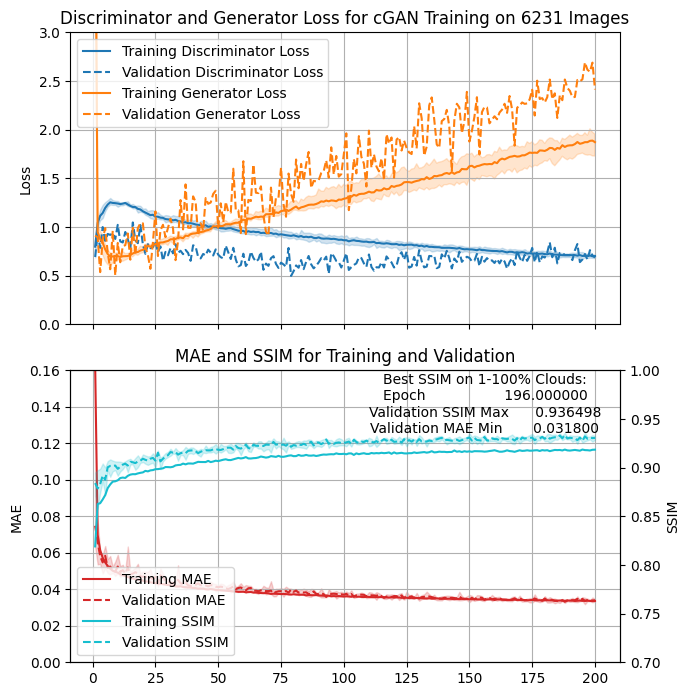

In [64]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 8), sharex=True)

# plotting D Loss and G Loss for both training and validation
ax1.plot(df["Epoch"], df["Training Discriminator Loss Mean"], color="tab:blue", label="Training Discriminator Loss")
ax1.plot(df["Epoch"], df["Validation Discriminator Loss Mean"], color="tab:blue", linestyle="--", label="Validation Discriminator Loss")
ax1.plot(df["Epoch"], df["Training Generator Loss Mean"], color="tab:orange", label="Training Generator Loss")
ax1.plot(df["Epoch"], df["Validation Generator Loss Mean"], color="tab:orange", linestyle="--", label="Validation Generator Loss")

ax1.fill_between(df["Epoch"], df["Training Discriminator Loss Min"], df["Training Discriminator Loss Max"], color="tab:blue", alpha=0.2)
ax1.fill_between(df["Epoch"], df["Training Generator Loss Min"], df["Training Generator Loss Max"], color="tab:orange", alpha=0.2)


ax1.set_ylabel("Loss")
ax1.set_ylim(0, 3.0)
ax1.set_title(f"Discriminator and Generator Loss for cGAN Training on {training_length} Images")
plt.suptitle("Best SSIM on 1-100% Clouds:\n" + str(df.iloc[df["Validation SSIM Max"].idxmax(), [0,-11,-2]])[:-25], fontsize=10, y=0.41, x = 0.7)
ax1.legend()
ax1.grid(True)

# plotting MSE and SSIM on separate y-axes
ax2.plot(df["Epoch"], df["Training MAE Mean"], color="tab:red", label="Training MAE")
ax2.plot(df["Epoch"], df["Validation MAE Mean"], color="tab:red", linestyle="--", label="Validation MAE")
ax2.set_ylabel("MAE")
ax2.set_ylim(0, 0.16)

ax2.fill_between(df["Epoch"], df["Validation MAE Min"], df["Validation MAE Max"], color="tab:red", alpha=0.2)

ax2_2 = ax2.twinx()
ax2_2.plot(df["Epoch"], df["Training SSIM Mean"], color="tab:cyan", label="Training SSIM")
ax2_2.plot(df["Epoch"], df["Validation SSIM Mean"], linestyle="--", color="tab:cyan", label="Validation SSIM")
ax2_2.set_ylabel("SSIM")
ax2_2.set_ylim(0.7, 1.0)

ax2_2.fill_between(df["Epoch"], df["Validation SSIM Min"], df["Validation SSIM Max"], color="tab:cyan", alpha=0.2)


# adding legend for the second y-axis
lines, labels = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_2.get_legend_handles_labels()
ax2_2.legend(lines + lines2, labels + labels2)

ax2.set_title("MAE and SSIM for Training and Validation")
ax2.grid(True)

# adjust layout to prevent clipping of labels
plt.tight_layout()
filename = root_dir / pathlib.Path("all_results") / job_id / 'training_graph.png'
plt.savefig(filename, dpi=300, bbox_inches='tight', format='png')